In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid, dtft2

In [3]:
p = Phantom()
e = p._ellipses[2]

In [4]:
e

Ellipse(rho=-0.2, a=0.11, b=0.31, x0=0.22, y0=0.0, phi_deg=-18.0)

In [5]:
Nx = Ny = 32
# Nx = Ny = 256
grid = RegularGrid(RegularAxis.linspace(-1, 1, Nx), RegularAxis.linspace(-1, 1, Ny))

In [6]:
A = e.raster(grid)

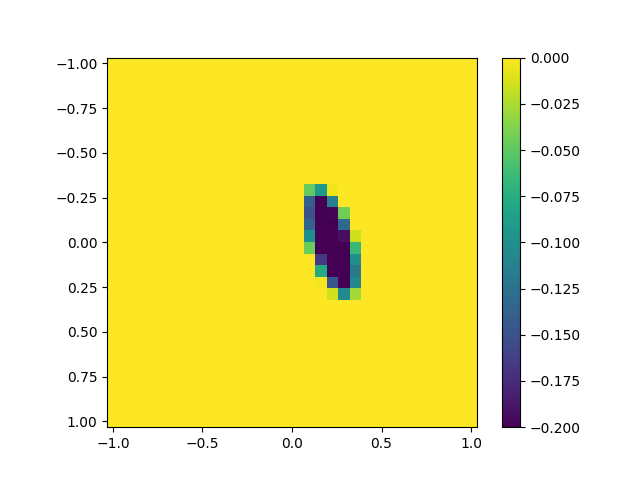

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, A)
fig.colorbar(im);

In [8]:
grid_Omega, A_Omega = grid.spectrum(A)

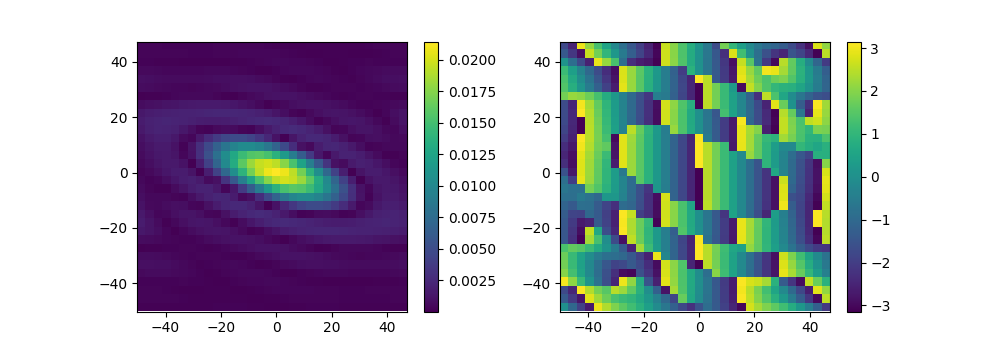

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega.imshow(ax[0], np.abs(A_Omega))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(A_Omega))
fig.colorbar(im, ax=ax[1]);

In [10]:
E_theory = e.fourier_transform_grid(grid_Omega.Hz())

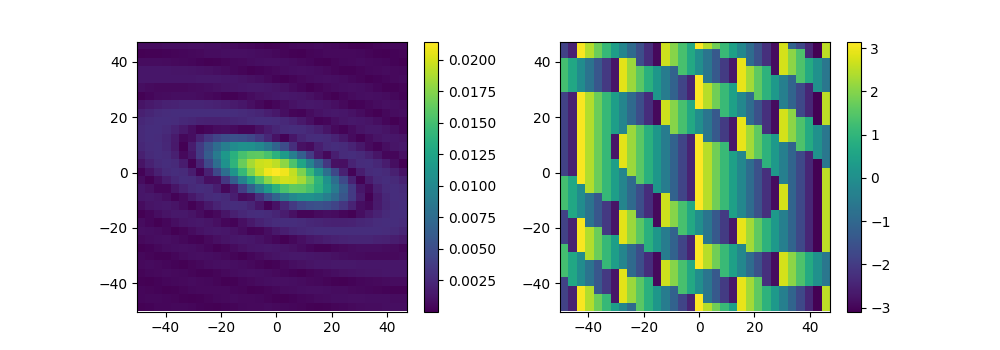

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega.imshow(ax[0], np.abs(E_theory))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(E_theory))
fig.colorbar(im, ax=ax[1]);

In [12]:
grid_Omega_real, A_Omega_real = grid.spectrum(A, real=True)

In [13]:
grid_Omega

<FreqRegularGrid <axis_x: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

In [14]:
grid_Omega_real

<RealFreqRegularGrid <axis_x: <RFFTRegularAxis x0=0 T=3.0434178831651124 N=17>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

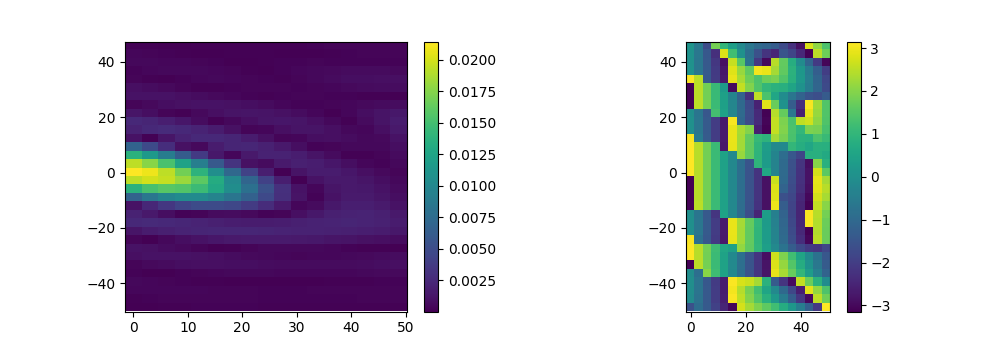

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega_real.imshow(ax[0], np.abs(A_Omega_real), aspect='auto')
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(A_Omega_real), )
fig.colorbar(im, ax=ax[1]);

In [16]:
E_theory_real = e.fourier_transform_grid(grid_Omega_real.Hz())

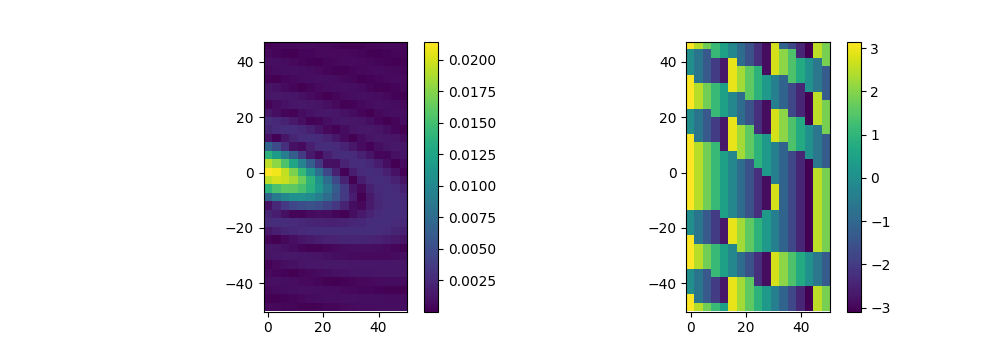

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_Omega_real.imshow(ax[0], np.abs(E_theory_real))
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(E_theory_real))
fig.colorbar(im, ax=ax[1]);

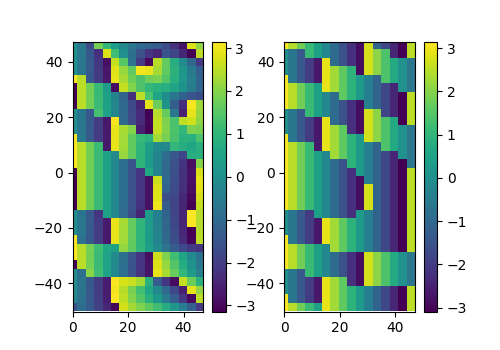

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(5, 3.5))
im = grid_Omega.imshow(ax[0], np.angle(A_Omega))
fig.colorbar(im, ax=ax[0])
im = grid_Omega.imshow(ax[1], np.angle(E_theory))
fig.colorbar(im, ax=ax[1]);
ax[0].set_xlim(xmin=0)
ax[1].set_xlim(xmin=0);

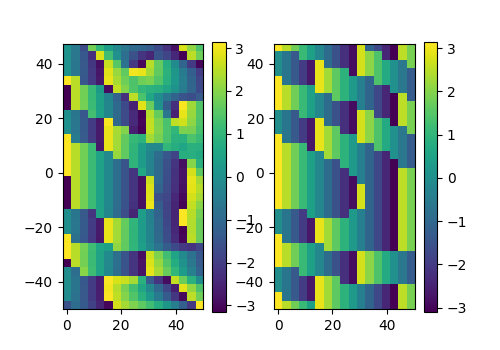

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(5, 3.5))
im = grid_Omega_real.imshow(ax[0], np.angle(A_Omega_real))
fig.colorbar(im, ax=ax[0])
im = grid_Omega_real.imshow(ax[1], np.angle(E_theory_real))
fig.colorbar(im, ax=ax[1]);

In [20]:
grid_dtft2, A_dtft2 = dtft2(A, n0=(grid.axis_y.x0/grid.axis_y.T, grid.axis_x.x0/grid.axis_x.T))

In [21]:
grid_idtft2, A_idtft2 = grid_dtft2.ispectrum(A_dtft2)

In [22]:
np.max(np.abs(np.imag(A_idtft2)))

1.9081958235744878e-17

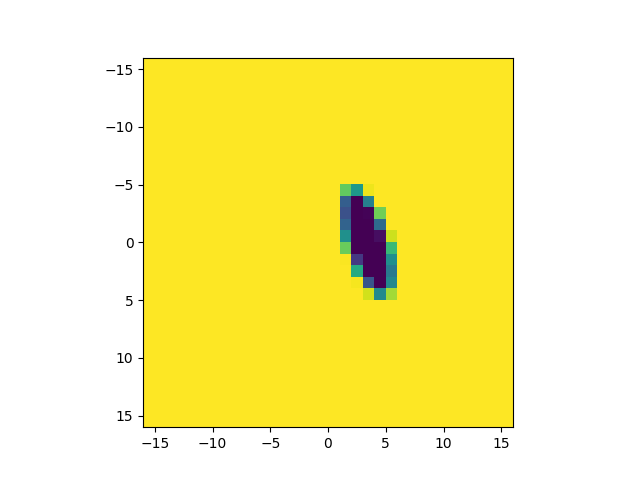

In [23]:
fig, ax = plt.subplots()
grid_idtft2.imshow(ax, np.real(A_idtft2))

In [24]:
grid_ispectrum, A_ispectrum = grid_Omega.ispectrum(A_Omega)

In [25]:
np.max(np.abs(np.imag(A_ispectrum)))

2.1144267609518458e-17

In [26]:
A_ispectrum = np.real(A_ispectrum)

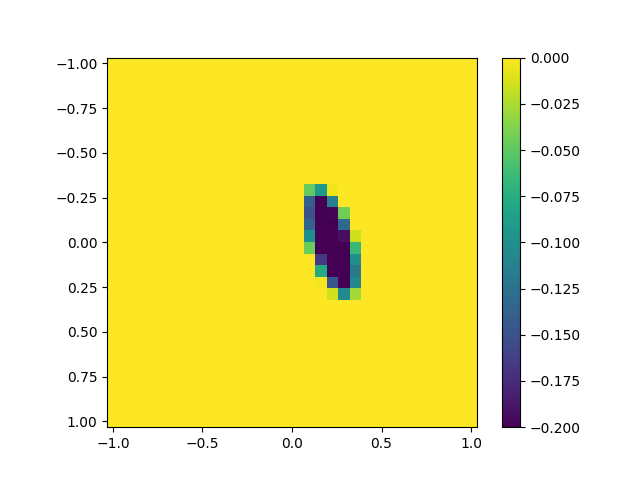

In [27]:
fig, ax = plt.subplots()
im = grid_ispectrum.imshow(ax, A_ispectrum)
fig.colorbar(im);

In [28]:
grid_Omega_real

<RealFreqRegularGrid <axis_x: <RFFTRegularAxis x0=0 T=3.0434178831651124 N=17>> <axis_y: <FFTRegularAxis x0=-48.6946861306418 T=3.0434178831651124 N=32>>>

In [29]:
grid_Omega_real.axis_x._order, grid_Omega_real.axis_y._order

(<Order.INCREASING: 1>, <Order.FFT: 2>)

In [30]:
grid_ispectrum_real, A_ispectrum_real = grid_Omega_real.ispectrum(A_Omega_real)

In [31]:
grid

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.06451612903225806 N=32>> <axis_y: <RegularAxis x0=-1 T=0.06451612903225806 N=32>>>

In [32]:
grid_ispectrum_real

<RegularGrid <axis_x: <RegularAxis x0=-1 T=0.06451612903225806 N=32>> <axis_y: <RegularAxis x0=-1 T=0.06451612903225806 N=32>>>

In [33]:
A_ispectrum_real.shape

(32, 32)

In [34]:
A_ispectrum_real

array([[ 1.20481966e-17,  9.68404319e-18,  5.60936127e-18, ...,
         8.28994057e-18,  4.26752425e-18,  4.22037395e-18],
       [ 8.78203760e-18,  1.17740397e-17,  6.58341117e-18, ...,
        -3.03128408e-18, -2.72878263e-18,  1.19755992e-18],
       [-5.69206141e-19,  3.70815139e-18,  1.84305674e-18, ...,
         1.71981321e-19, -3.57337214e-18, -3.83704380e-18],
       ...,
       [ 1.53279082e-17,  1.52597994e-17,  5.98090835e-18, ...,
         4.66444405e-18,  1.38540256e-17,  2.15774869e-17],
       [ 1.29968735e-17,  9.72878892e-18,  3.94457196e-18, ...,
         1.49997466e-19,  6.01136725e-18,  1.54083076e-17],
       [ 6.99310401e-18,  3.35734618e-18,  3.47556965e-18, ...,
         1.94771248e-18,  1.74260890e-19,  6.43628503e-18]])

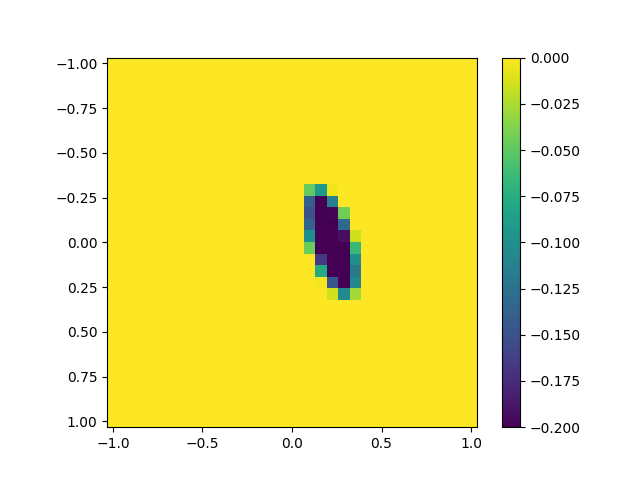

In [35]:
fig, ax = plt.subplots()
im = grid_ispectrum_real.imshow(ax, A_ispectrum_real)
fig.colorbar(im);